# Agenda:

This notebook applies SMOTENC to tackle the imbalance dataset issue
In 0.1_EDA, we observed the number of positive cases of diabetes are far greater than the negative cases.

In this notebook, We work only on the training dataset and do the following:
1. Load training dataset
2. Apply standardization
3. Apply SMOTENC
4. Visualize the difference (using PCA to reduce the dimensions)
5. Save the new training dataset

# 1. Imports

In [1]:
# Linear algebra and reading csv
import numpy as np
import pandas as pd

# Ploting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

# 2. Loading Imputed Data 

In [3]:
X_train = pd.read_csv("../outputs/imputed_X_train.csv")
y_train = pd.read_csv("../outputs/imputed_y_train.csv")

def map_df(data):
    data["GenderCategory"] = data["GenderCategory"].map({1: "Female", 2: "Male"})
    data["RaceCategory"] = data["RaceCategory"].map({1:"White", 2:"Black", 3:"Unknown"})
    data["EthnicityCategory"] = data["EthnicityCategory"].map({1: "Non-Hispanic", 2:"Hispanic", 3: "Unknown"})
    data["Region"] = data["Region"].map({1: "Northeast", 2: "Midwest", 3: "South", 4: "West", 5: "Unknown"})

    return data

X_train = map_df(X_train.copy(deep = True))

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   GenderCategory                 670 non-null    object
 1   RaceCategory                   670 non-null    object
 2   EthnicityCategory              670 non-null    object
 3   Age                            670 non-null    int64 
 4   Region                         670 non-null    object
 5   Glipizide_Final                670 non-null    int64 
 6   Glimepiride_Final              670 non-null    int64 
 7   Glyburide_Final                670 non-null    int64 
 8   Metformin_Final                670 non-null    int64 
 9   Pioglitazone_Final             670 non-null    int64 
 10  Rosiglitazone_Final            670 non-null    int64 
 11  Beta_Blockers_Final            670 non-null    int64 
 12  ACE_Inhibitors_Final           670 non-null    int64 
 13  ARB_F

In [5]:
X_train = X_train.drop(["InsulinTest_Final", "Alpha_Blockers_Final", "Centrally_Acting_Agents_Final"], axis = 1)

In [6]:
numerical_col = ["Age"]
categorical_col = list(X_train.columns)
categorical_col.remove("Age")
X_train[categorical_col] = X_train[categorical_col].astype('category')

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   GenderCategory          670 non-null    category
 1   RaceCategory            670 non-null    category
 2   EthnicityCategory       670 non-null    category
 3   Age                     670 non-null    int64   
 4   Region                  670 non-null    category
 5   Glipizide_Final         670 non-null    category
 6   Glimepiride_Final       670 non-null    category
 7   Glyburide_Final         670 non-null    category
 8   Metformin_Final         670 non-null    category
 9   Pioglitazone_Final      670 non-null    category
 10  Rosiglitazone_Final     670 non-null    category
 11  Beta_Blockers_Final     670 non-null    category
 12  ACE_Inhibitors_Final    670 non-null    category
 13  ARB_Final               670 non-null    category
 14  Diuretics_Final         67

In [8]:
cat_col_numbers = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(include="category")]

# 3. Standardize the data 

In [9]:
X_train_scaled = X_train.copy("deep")

In [10]:
scaler = StandardScaler()
X_train_scaled["Age"] = scaler.fit_transform(X_train_scaled["Age"].values.reshape(-1,1))

In [11]:
X_train_scaled.head()

,GenderCategory,RaceCategory,EthnicityCategory,Age,Region,Glipizide_Final,Glimepiride_Final,Glyburide_Final,Metformin_Final,Pioglitazone_Final,...,Eye_Disorder_Final,Atherosclerosis_Final,Alzheimer_Final,FootUlcer_Final,Abnormal_Glucose_Final,DMScreen_Final,A1C_Final,GlucoseTest_Final,DM_Drugs,AnyLab
0,Female,White,Non-Hispanic,-0.387508,West,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Male,White,Non-Hispanic,-1.026402,South,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Male,White,Non-Hispanic,0.331247,Midwest,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Female,White,Non-Hispanic,1.129864,South,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,Male,White,Non-Hispanic,0.890279,Northeast,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# 4. Apply SMOTENC

In [12]:
smotenc = SMOTENC(categorical_features= cat_col_numbers, sampling_strategy = 0.35, random_state = 42, k_neighbors=5)
X_train_SMOTE, y_train_SMOTE = smotenc.fit_resample(X_train_scaled, y_train)


print("Before SMOTE: ", X_train_scaled.shape)
print("After SMOTE: ", X_train_SMOTE.shape)

Before SMOTE:  (670, 39)
After SMOTE:  (733, 39)


### Reduce dimesnions using PCA and Visualize the difference

In [13]:
pca = PCA(n_components=2, random_state = 42)
X_train_scaled_OHE = pd.get_dummies(X_train_scaled)
X_train_pca_before = pca.fit_transform(X_train_scaled_OHE)

X_train_SMOTE_OHE = pd.get_dummies(X_train_SMOTE)
X_train_pca_after = pca.transform(X_train_SMOTE_OHE)

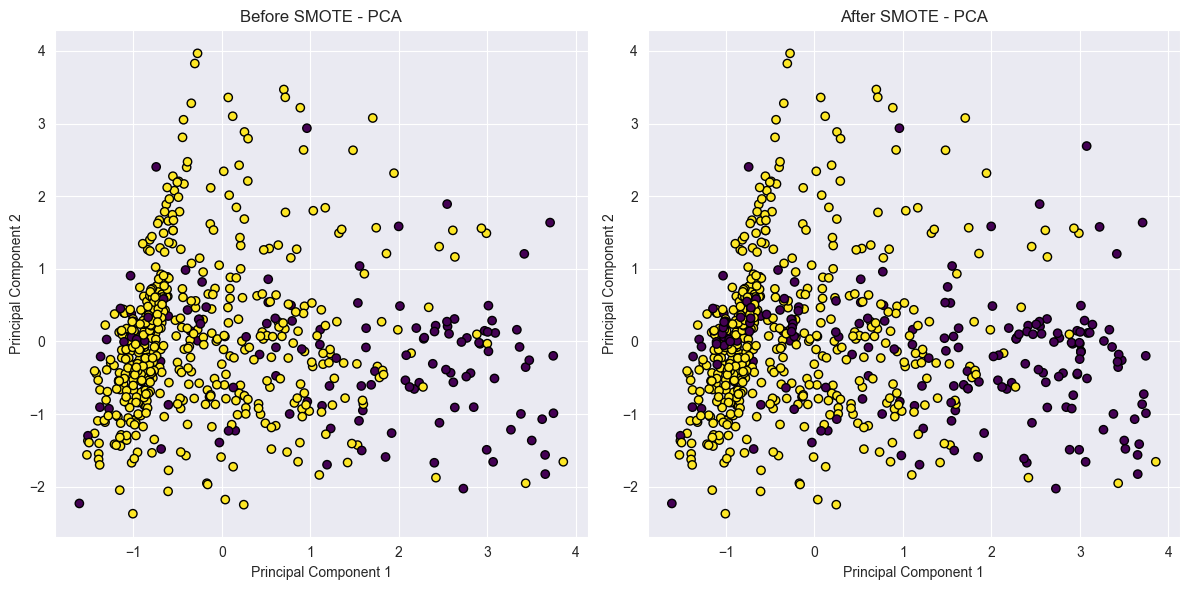

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca_before[:, 0], X_train_pca_before[:, 1], c=y_train.values, cmap='viridis', edgecolor='k')
plt.title('Before SMOTE - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_train_pca_after[:,0], X_train_pca_after[:, 1], c=y_train_SMOTE.values, cmap='viridis', edgecolor='k')
plt.title('After SMOTE - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

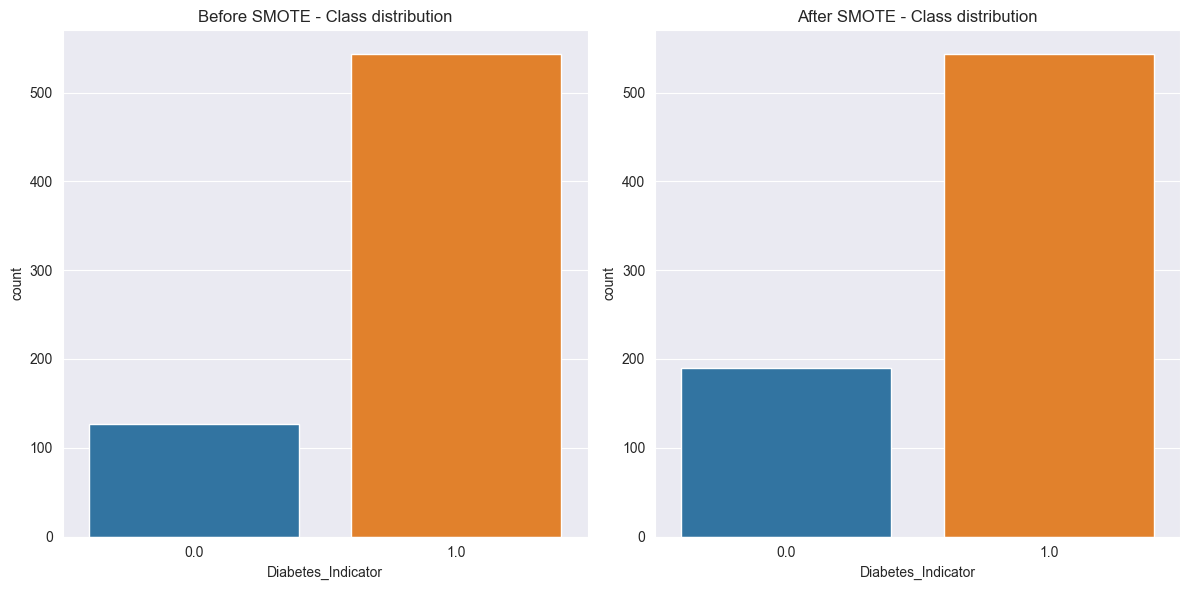

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data = y_train, x = "Diabetes_Indicator")
plt.title('Before SMOTE - Class distribution')

plt.subplot(1, 2, 2)
sns.countplot(data = y_train_SMOTE, x = "Diabetes_Indicator")
plt.title('After SMOTE - Class distribution')
plt.tight_layout()
plt.show()

In [16]:
X_train_SMOTE = pd.DataFrame(X_train_SMOTE, columns= X_train.columns)

In [17]:
X_train_SMOTE

,GenderCategory,RaceCategory,EthnicityCategory,Age,Region,Glipizide_Final,Glimepiride_Final,Glyburide_Final,Metformin_Final,Pioglitazone_Final,...,Eye_Disorder_Final,Atherosclerosis_Final,Alzheimer_Final,FootUlcer_Final,Abnormal_Glucose_Final,DMScreen_Final,A1C_Final,GlucoseTest_Final,DM_Drugs,AnyLab
0,Female,White,Non-Hispanic,-0.387508,West,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Male,White,Non-Hispanic,-1.026402,South,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Male,White,Non-Hispanic,0.331247,Midwest,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Female,White,Non-Hispanic,1.129864,South,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,Male,White,Non-Hispanic,0.890279,Northeast,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,Female,White,Non-Hispanic,0.139932,West,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
729,Female,White,Non-Hispanic,-0.350759,West,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
730,Male,White,Non-Hispanic,0.010578,West,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
731,Male,White,Non-Hispanic,-0.499316,South,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Standardize the test dataset with the same std

In [18]:
X_test = pd.read_csv("../outputs/imputed_X_test.csv")
X_test = map_df(X_test.copy(deep = True))

X_test = X_test.drop(["InsulinTest_Final", "Alpha_Blockers_Final", "Centrally_Acting_Agents_Final"], axis = 1)
X_test["Age"] = scaler.transform(X_test["Age"].values.reshape(-1,1))

In [19]:
X_test

,GenderCategory,RaceCategory,EthnicityCategory,Age,Region,Glipizide_Final,Glimepiride_Final,Glyburide_Final,Metformin_Final,Pioglitazone_Final,...,Eye_Disorder_Final,Atherosclerosis_Final,Alzheimer_Final,FootUlcer_Final,Abnormal_Glucose_Final,DMScreen_Final,A1C_Final,GlucoseTest_Final,DM_Drugs,AnyLab
0,Female,White,Non-Hispanic,-0.227785,Northeast,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Female,White,Non-Hispanic,0.171524,Midwest,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Female,White,Non-Hispanic,2.008343,South,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Male,White,Non-Hispanic,-0.307646,South,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Male,White,Non-Hispanic,0.490971,Midwest,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Male,White,Non-Hispanic,-0.068061,Midwest,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326,Female,White,Non-Hispanic,-1.345849,South,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
327,Female,White,Non-Hispanic,0.890279,Northeast,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328,Male,White,Non-Hispanic,0.970141,South,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_train_SMOTE.to_csv("../outputs/imputed_X_train_SMOTE_0_35.csv", index = False)
y_train_SMOTE.to_csv("../outputs/imputed_y_train_SMOTE_0_35.csv", index = False)
X_test.to_csv("../outputs/imputed_X_test_scaled_0_35.csv", index = False)